In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay


In [2]:

path = '../diabetesData/2015.csv'
df = pd.read_csv(path)
df.shape

(441456, 330)

In [3]:
selected_features = ['GENHLTH',
                    'MENTHLTH',
                    'CHECKUP1',
                    '_RFHYPE5',
                    'BPMEDS',
                    '_RFCHOL',
                    '_MICHD',
                    'CVDSTRK3',
                    'CHCSCNCR',
                    "CHCCOPD1",
                    "ADDEPEV2",
                    'CHCKIDNY',
                    'DIABETE3',
                    "SEX",
                    "INCOME2",
                    "DIFFWALK",
                    "_SMOKER3",
                    "_AGE80",
                    "_BMI5",
                    "_EDUCAG",
                    "_DRNKWEK",
                    "_TOTINDA"]

df = df[selected_features]

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.shape)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

First few rows of the dataset:
(441456, 22)

Missing values:
GENHLTH          2
MENTHLTH         0
CHECKUP1         1
_RFHYPE5         0
BPMEDS      263268
_RFCHOL      59154
_MICHD        3942
CVDSTRK3         0
CHCSCNCR         1
CHCCOPD1         0
ADDEPEV2         0
CHCKIDNY         0
DIABETE3         7
SEX              0
INCOME2       3301
DIFFWALK     12334
_SMOKER3         0
_AGE80           0
_BMI5        36398
_EDUCAG          0
_DRNKWEK         0
_TOTINDA         0
dtype: int64


In [4]:
dataset = df.copy()
cleaning_instructions = {
    'GENHLTH': {'drop_values': [7, 9,np.nan], 'map_function': lambda x: 5-x},
    'MENTHLTH': {'drop_values': [77, 99], 'map_values': {88: 0}},
    'CHECKUP1': {'drop_values': [7, 9,np.nan], 'map_values': {8: 0}},
    '_RFHYPE5': {'drop_values': [9], 'map_values': {2: 0}},
    'BPMEDS': {'drop_values': [7, 9], 'map_values': {np.nan: 0}},
    '_RFCHOL': {'drop_values': [9, np.nan], 'map_function': lambda x: x-1},
    '_MICHD': {'drop_values': [np.nan], 'map_values': {2: 0}},
    'CVDSTRK3': {'drop_values': [7, 9], 'map_values': {2: 0}},
    'CHCSCNCR': {'drop_values': [7, 9, np.nan], 'map_values': {2: 0}},
    'CHCCOPD1': {'drop_values': [7, 9], 'map_values': {2: 0}},
    'ADDEPEV2': {'drop_values': [7, 9], 'map_values': {2: 0}},
    'CHCKIDNY': {'drop_values': [7, 9], 'map_values': {2: 0}},
    'DIABETE3': {'drop_values': [7, 9, np.nan], 'map_values': {2: 0, 3: 0, 4: 0}},
    'SEX': {'map_values': {2: 0}},
    'INCOME2': {'drop_values': [77, 99, np.nan]},
    'DIFFWALK': {'drop_values': [7, 9, np.nan], 'map_values': {2: 0}},
    '_SMOKER3': {'drop_values': [9], 'map_function': lambda x: 4-x},
    '_AGE80': {},  # No cleaning required
    '_BMI5': {'drop_values': [np.nan], 'map_function':lambda x: np.floor(x/100)},
    '_EDUCAG': {'drop_values': [9], 'map_function': lambda x: x-1},
    '_DRNKWEK': {'drop_values': [99900]},
    '_TOTINDA': {'drop_values': [9], 'map_values': {2: 0}}
}

# Apply data cleaning instructions
for feature in selected_features:
    if feature in cleaning_instructions:
        # Drop specified values
        if 'drop_values' in cleaning_instructions[feature]:
            dataset = dataset[~dataset[feature].isin(cleaning_instructions[feature]['drop_values'])]
        
        if 'map_values' in cleaning_instructions[feature]:
            dataset[feature].replace(cleaning_instructions[feature]['map_values'], inplace=True)
            
        if 'map_function' in cleaning_instructions[feature]:
            dataset[feature] = dataset[feature].apply(cleaning_instructions[feature]['map_function'])
            


# Display cleaned dataframe
print(dataset.head())
print(dataset.shape)
# Check for missing values
if dataset.isna().any().any():
    print("There are still NaN.")
else:
    print("none NaN.")

dataset.to_csv('../diabetesData/diabetes_clean_2015.csv',index=False)

   GENHLTH  MENTHLTH  CHECKUP1  _RFHYPE5  BPMEDS  _RFCHOL  _MICHD  CVDSTRK3  \
0      0.0      18.0       1.0       0.0     1.0      1.0     0.0       0.0   
1      2.0       0.0       4.0       1.0     0.0      0.0     0.0       0.0   
3      0.0      30.0       1.0       0.0     1.0      1.0     0.0       0.0   
5      3.0       0.0       1.0       0.0     1.0      0.0     0.0       0.0   
6      3.0       3.0       1.0       0.0     1.0      1.0     0.0       0.0   

   CHCSCNCR  CHCCOPD1  ...  DIABETE3  SEX  INCOME2  DIFFWALK  _SMOKER3  \
0       0.0       1.0  ...       0.0  0.0      3.0       1.0       1.0   
1       0.0       0.0  ...       0.0  0.0      1.0       0.0       3.0   
3       0.0       0.0  ...       0.0  0.0      8.0       1.0       0.0   
5       0.0       0.0  ...       0.0  0.0      6.0       0.0       0.0   
6       0.0       0.0  ...       0.0  0.0      4.0       0.0       0.0   

   _AGE80  _BMI5  _EDUCAG      _DRNKWEK  _TOTINDA  
0    63.0   40.0      1.0  5

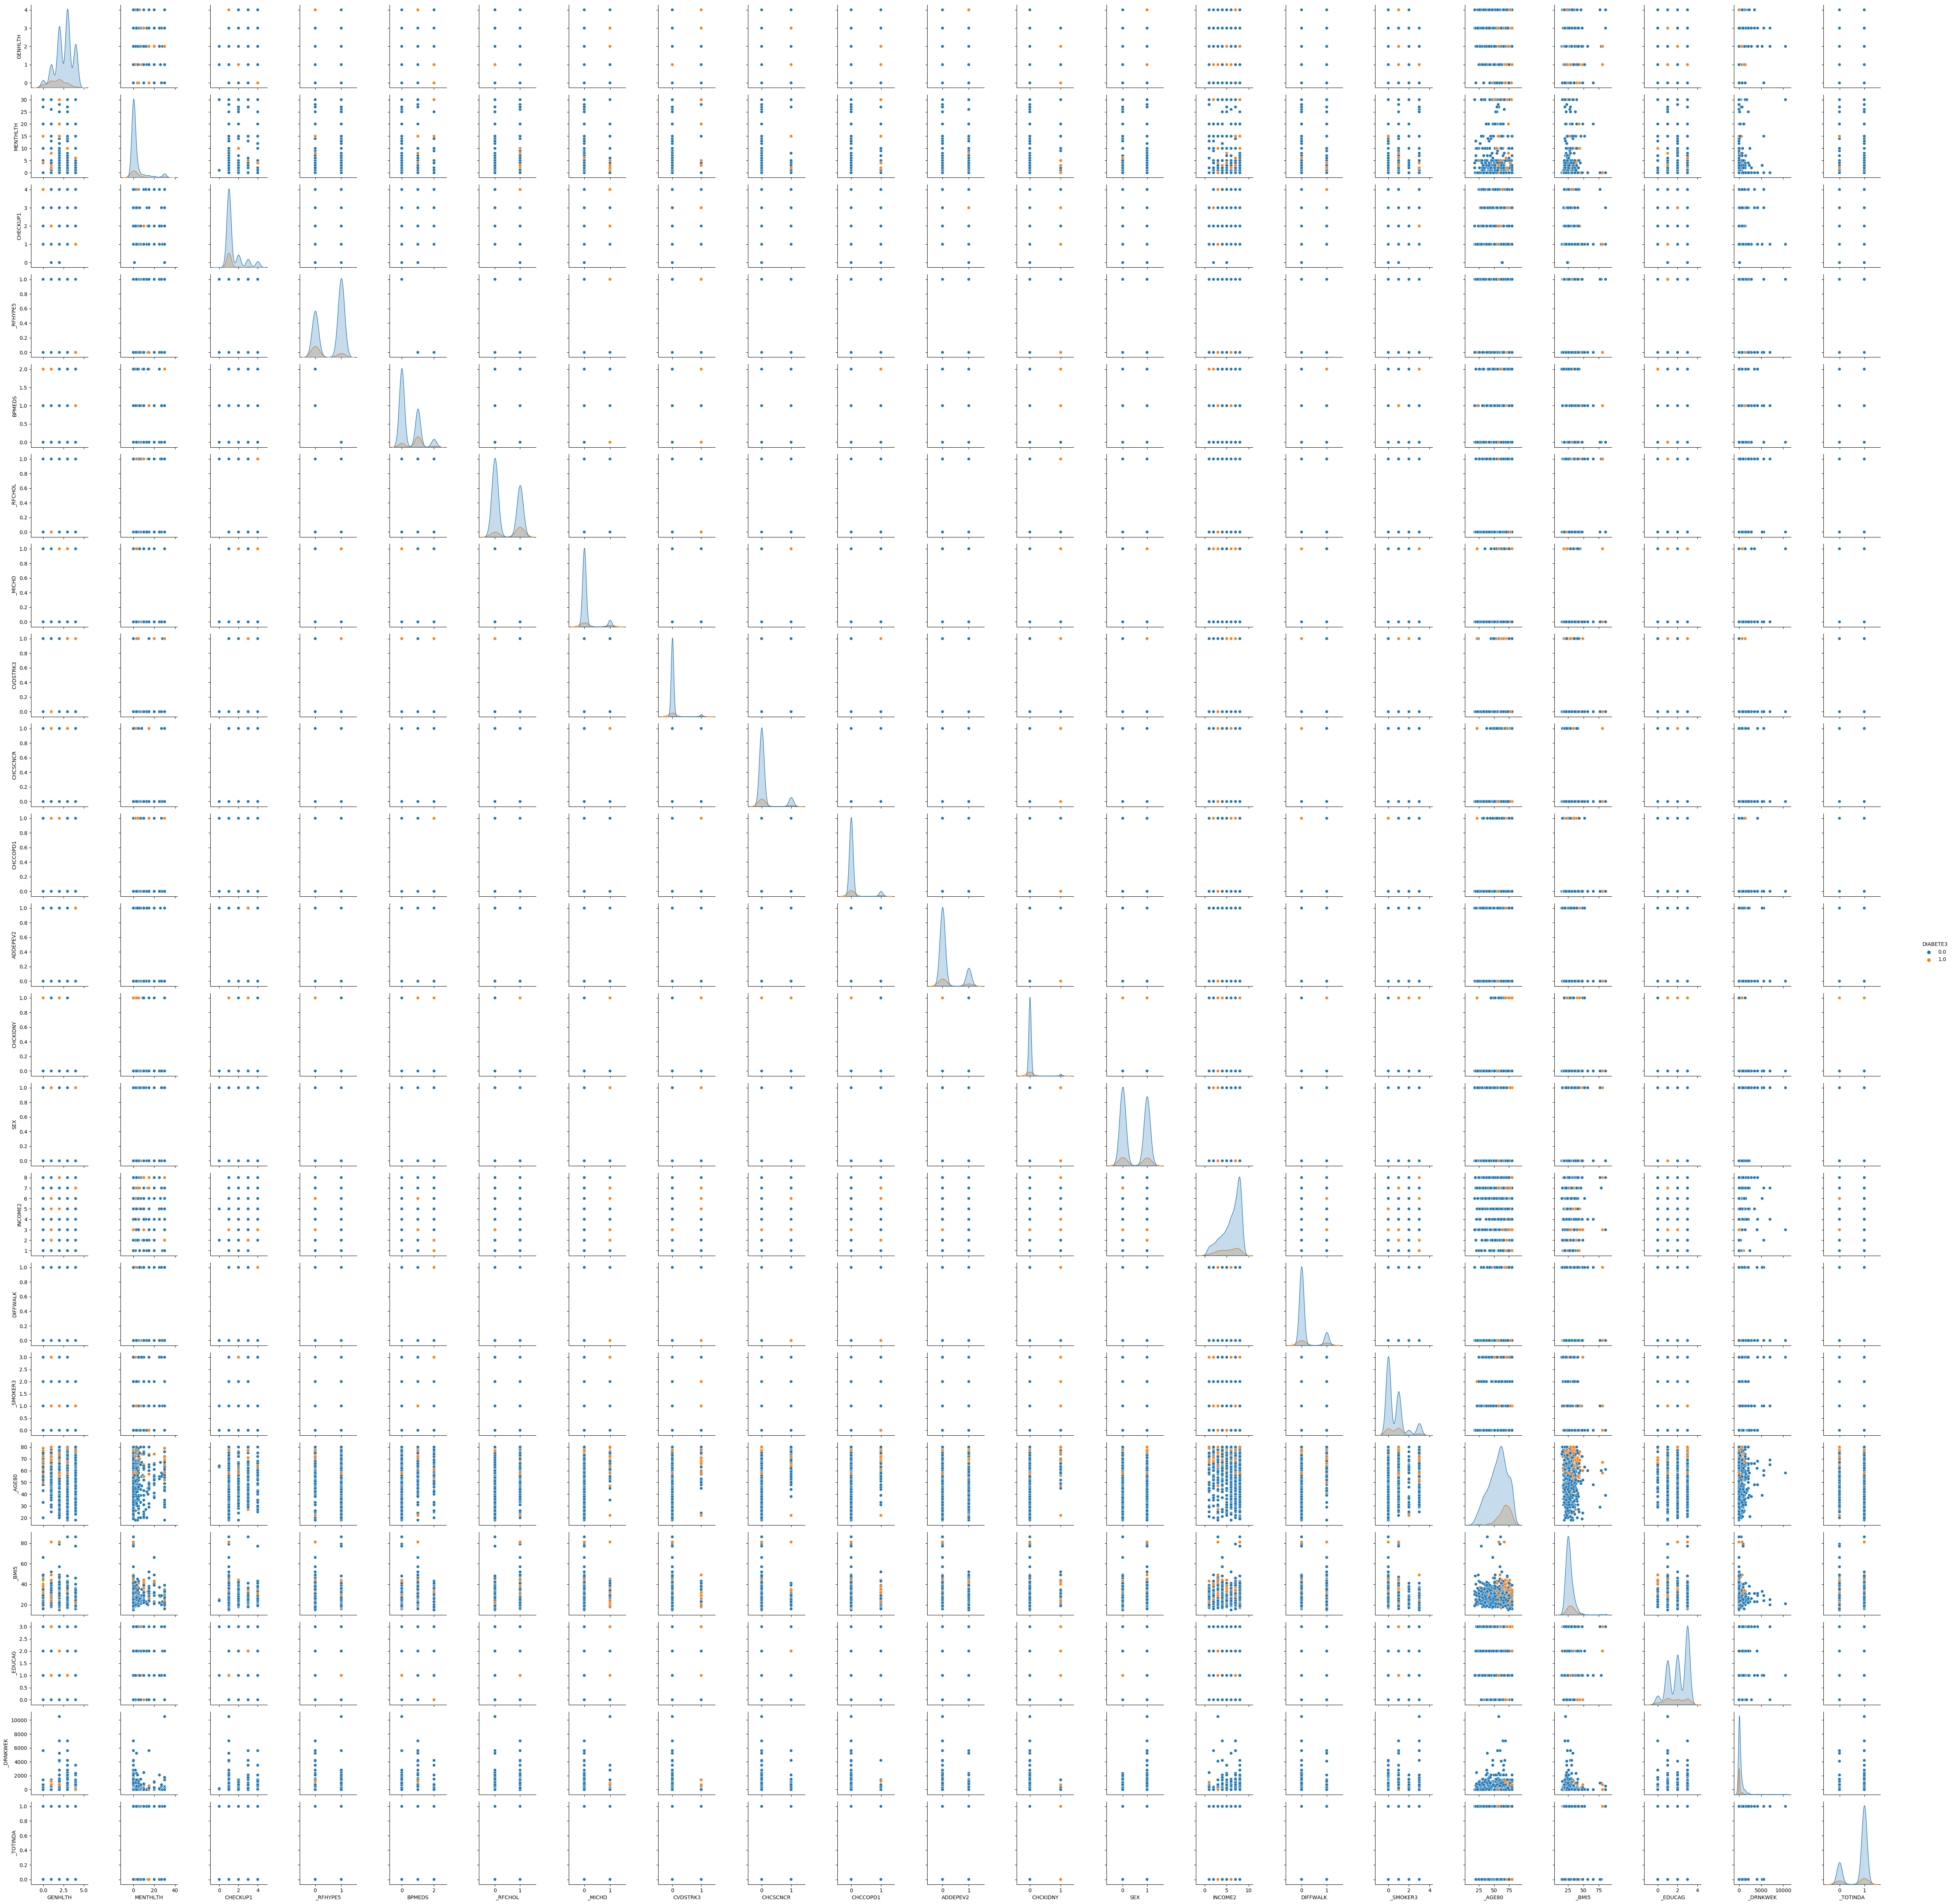

In [5]:
# sns.pairplot(dataset.sample(1000), hue='DIABETE3', diag_kind='kde')
# plt.show()

In [6]:
# Count the number of samples with DIABETE3 value as 1
count_diabetes = dataset['DIABETE3'].value_counts().get(1, 0)

print("Number of samples with DIABETE3 value as 1:", count_diabetes)

Number of samples with DIABETE3 value as 1: 37177


In [7]:

target_column = 'DIABETE3'
X = dataset.drop(columns=[target_column])  # Features
y = dataset[target_column]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)


Accuracy: 0.8607250755287009


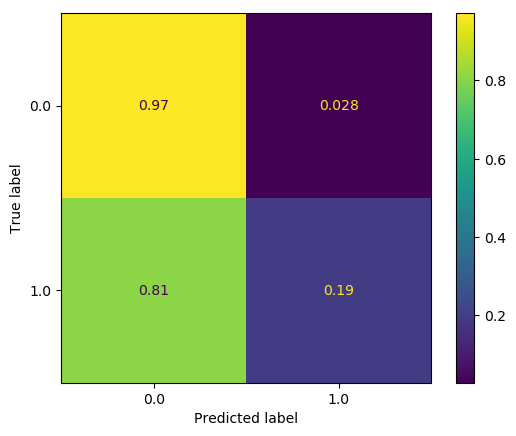

In [12]:
# Instantiate Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=69,verbose=0)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Assuming y_true and y_pred are the true labels and predicted labels, respectively
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=dataset['DIABETE3'].unique())
disp.plot()
plt.show()

In [25]:
dataset = dataset.astype(int)

# Assuming df is your DataFrame and 'target_column' is your target variable column
# Count the number of instances for each class
class_counts = dataset[target_column].value_counts()

# Find the minority and majority classes
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()

print(target_column,majority_class,minority_class)
# Calculate the difference in the number of instances between classes
difference = class_counts[majority_class] - class_counts[minority_class]

# If the classes are already balanced, no action is needed
if difference == 0:
    print("Classes are already balanced.")
else:
    # Sample instances from the majority class to make classes equal
    sampled_majority = dataset[dataset[target_column] == majority_class].sample(n=difference, random_state=42)
    
    # Drop the excess instances from the majority class
    dataset_balanced = dataset.drop(sampled_majority.index)
    
    print("Balanced dataset shape:", dataset_balanced.shape)

X = dataset_balanced.drop(columns=[target_column])  # Features
y = dataset_balanced[target_column]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

DIABETE3 0 1
Balanced dataset shape: (74354, 22)


Accuracy: 0.7483693093941228


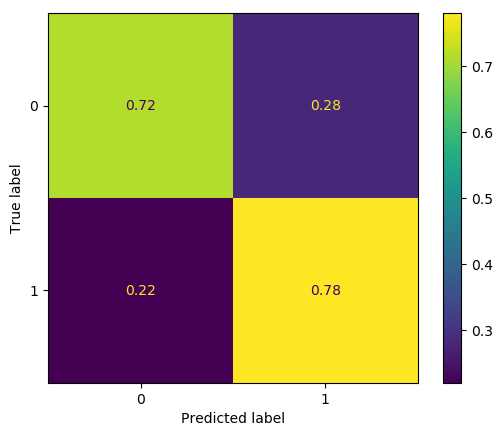

In [26]:
# Instantiate Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=69,verbose=0)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Assuming y_true and y_pred are the true labels and predicted labels, respectively
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=dataset['DIABETE3'].unique())
disp.plot()
plt.show()